In [2]:
# Importing neccasary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [10]:
data =  pd.read_csv("C:\\Users\\Rakesh\\OneDrive\\Desktop\\avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [13]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [15]:
px.histogram(x = data["AveragePrice"])

there is an outlier which needs to be removed

In [17]:
px.histogram(x = data["Total Volume"])

outliers present and they need to be removed

<AxesSubplot:xlabel='AveragePrice'>

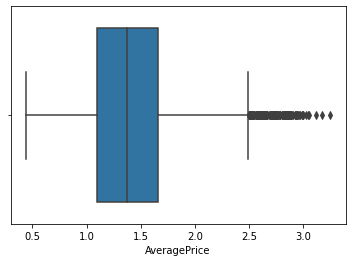

In [20]:
sns.boxplot(x=data["AveragePrice"])

<AxesSubplot:xlabel='Total Volume'>

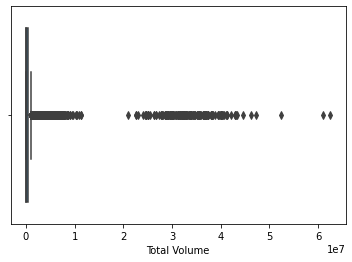

In [21]:
sns.boxplot(x=data["Total Volume"])

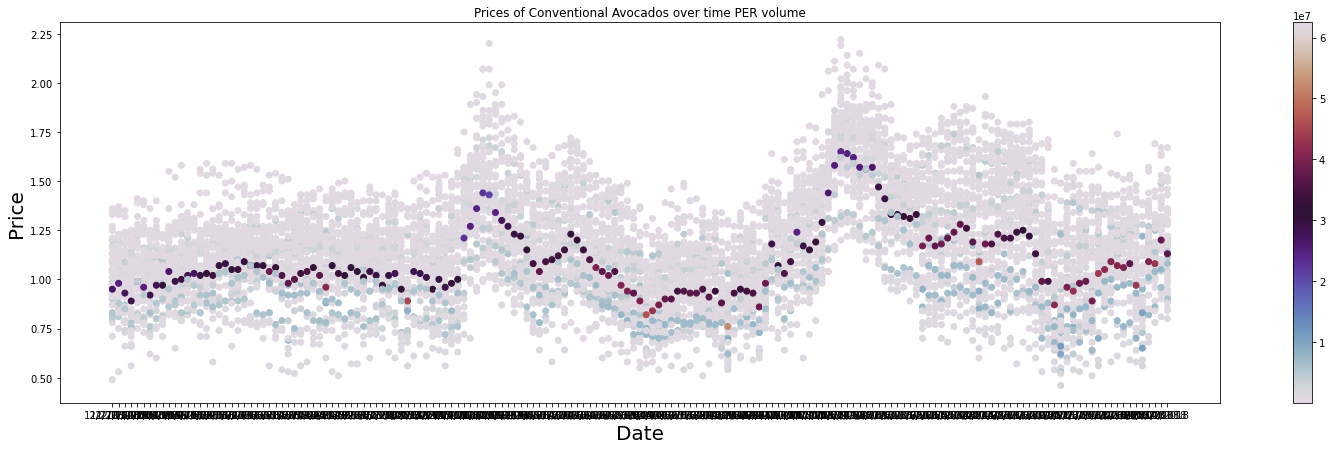

In [24]:
# Checking the prices of avocados

# Checking the prices of conventional avocados

conventional_avocados = data["type"]== "conventional"
organic_avocados = data["type"]== "organic"

# fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
fig = plt.figure(figsize = (26, 7))


# Data - CONVENTIONAL
dates_conventional = data[conventional_avocados]["Date"].tolist()
average_prices_conventional = data[conventional_avocados]["AveragePrice"].tolist()
total_volume_conventional = data[conventional_avocados]["Total Volume"]

# Data - ORGANIC
dates_organic = data[organic_avocados]["Date"].tolist()
average_prices_organic = data[organic_avocados]["AveragePrice"].tolist()
total_volume_organic = data[organic_avocados]["Total Volume"]


# Plot
plt.scatter(dates_conventional, average_prices_conventional, c=total_volume_conventional, cmap="twilight")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Conventional Avocados over time PER volume")
plt.show()



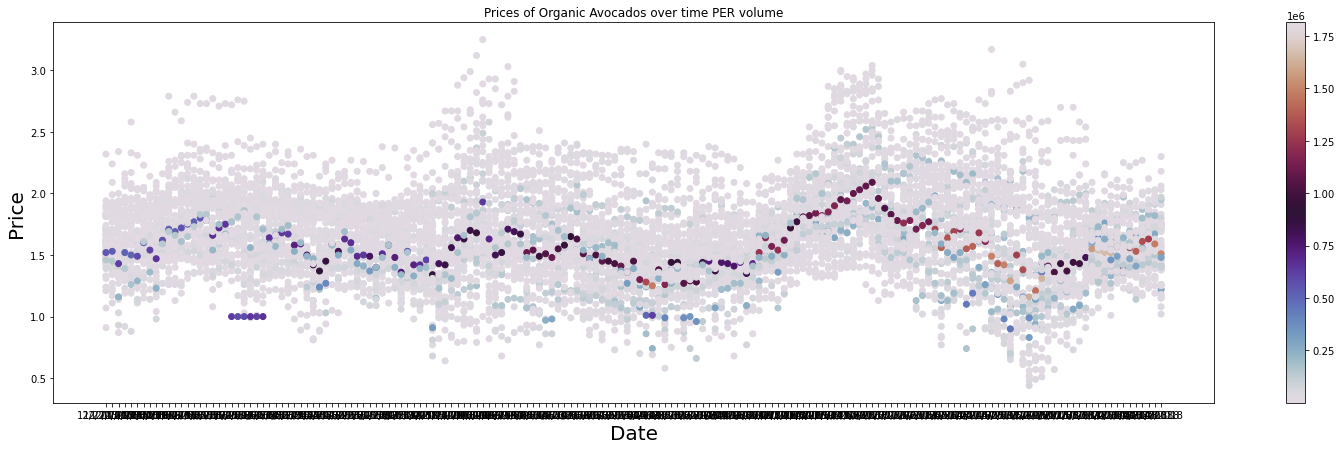

In [25]:
fig = plt.figure(figsize = (26, 7))
plt.scatter(dates_organic, average_prices_organic, c=total_volume_organic, cmap="twilight")
plt.colorbar()
plt.xlabel("Date", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.title("Prices of Organic Avocados over time PER volume")
plt.show()

In [26]:
data.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [27]:
data.region.unique() 

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [28]:
# Basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regions_to_remove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
data = data[~data.region.isin(regions_to_remove)]
len(data.region.unique())

43

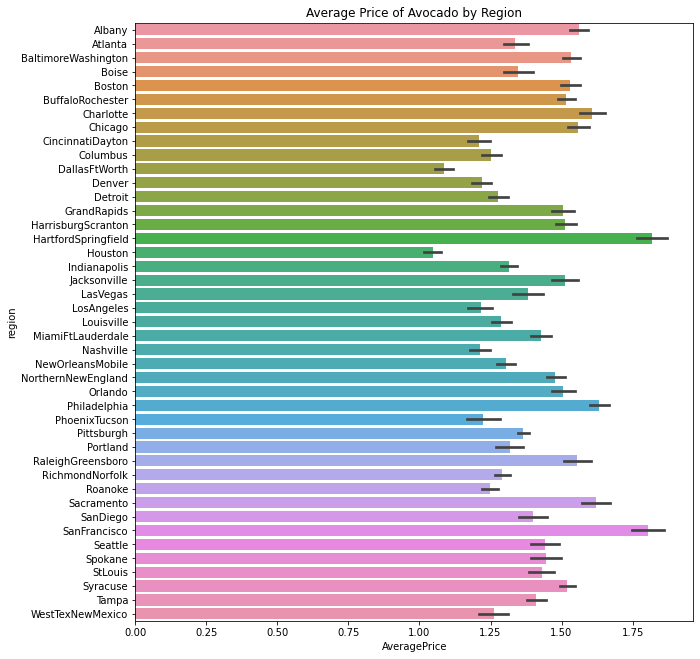

In [29]:
# The average prices by regions
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
sns.barplot(y="region",x="AveragePrice", data= data)
plt.show()

In [31]:
# Check for NULL values
data.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

no null values

In [32]:
#now using pd.get_dummies and deal with outliers

data.drop(columns="Date", inplace=True)
data = pd.get_dummies(data, drop_first=True)
data.shape

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_30408\2236371957.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(14531, 54)

In [33]:
# Scaling via RobustScaler
robust_scaler = RobustScaler()
robust_scaler.fit(data)
robust_scaler.transform(data)

array([[-0.85714286, -0.07142857,  0.00654899, ...,  0.        ,
         0.        ,  0.        ],
       [-0.82142857, -0.03571429, -0.02510212, ...,  0.        ,
         0.        ,  0.        ],
       [-0.78571429, -0.78571429,  0.18910307, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.53571429,  0.89285714, -0.16412283, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5       ,  1.        , -0.15587679, ...,  0.        ,
         0.        ,  1.        ],
       [-0.46428571,  0.44642857, -0.15153352, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
# Applying PCA
pca = PCA(n_components=2)
pca.fit(data)

# Some PCA stats
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.90395013 0.04866989]
[60396065.58412544 14014145.24368132]


In [35]:
data

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,...,0,0,0,0,0,0,0,0,0,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0,0,0,0,0,0,0,0,0,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0,0,0,0,0,0,0,0,0,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
import warnings
warnings.filterwarnings("ignore")

def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

ddata = cap_data(data)

<AxesSubplot:xlabel='Total Volume'>

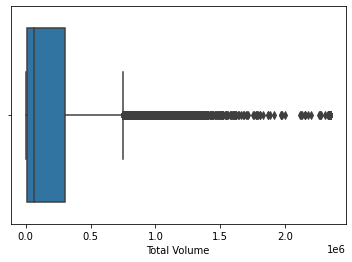

In [38]:
sns.boxplot(x=data["Total Volume"])

Modelling¶
In this part, we'll train our ML model to predict the average price of the avocados. We'll be using the following algorithms:

Random Forest
Linear Regression
XGBoost (Best for Outliers)

In [39]:
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Set the features and targets
features = data.drop(columns="AveragePrice")
target = data.AveragePrice

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [41]:
# Feature Importance
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
round(model_dt.score(X_test, y_test), 2) * 100

81.0

In [42]:
y_test.shape

(2907,)

In [44]:
pip install graphviz

In [48]:
from sklearn import tree
import graphviz 
plt.figure(figsize=(10, 8))
dot_data = tree.export_graphviz(model_dt, max_depth=2, filled=True, rounded=True, feature_names=data.columns.drop("AveragePrice"));
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 720x576 with 0 Axes>

In [50]:
#Traing the other 3 models
modelclasses = [
    ["Linear Regression", LinearRegression()],
    ["Decision Tree Regressor", DecisionTreeRegressor()],
    ["Random Forest Regressor", RandomForestRegressor()],
    ["XGBoost Regressor", XGBRegressor()]
]

insights = []
for modelname, Model in modelclasses:
    model = Model
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)        
    insights.append((modelname, score))

In [51]:
insights.sort(key=lambda x:x[-1], reverse=True)
insights

pd.DataFrame(insights, columns=["Model Name", "Score"])

,Model Name,Score
0,Random Forest Regressor,0.916749
1,XGBoost Regressor,0.915121
2,Decision Tree Regressor,0.811404
3,Linear Regression,0.586488
